In [23]:
from skimage.feature import local_binary_pattern
from skimage.exposure import equalize_hist
from skimage.color import rgb2gray
import matplotlib.pylab as plt
import numpy as np
from sklearn import preprocessing
%matplotlib inline

from glob import glob
from scipy import misc
def read_images(patch_folder):
    imgs, labels = [], []
    for f in glob(patch_folder+"/*/*.jpg"):
        label = f.split("/")[-2]
        img = misc.imread(f)
        imgs.append(img)
        labels.append(label)
    return imgs, labels
#imgs, labels = read_images("/home/ruoxu/workspace/data/company/NTU-AVI/data/C3_sy/train")
imgs, labels = read_images("data/")

def preprocess(img):
    newimg = misc.imresize(img, (100, 100))
    #newimg = equalize_hist(img)
    return newimg

imgs = map(preprocess, imgs)
def extract_features(img, P = 8, R = 1):
    if (img.ndim > 2):
        img = rgb2gray(img)
    return local_binary_pattern(img, P, R, ).ravel()
feats = np.asarray(map(extract_features, imgs))
feats = preprocessing.normalize(feats, axis = 1)

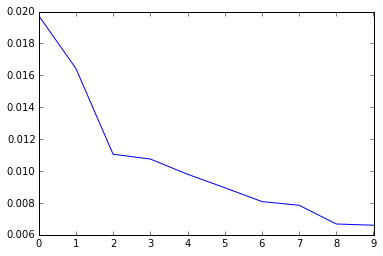

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, whiten=True)
pca.fit(feats)
plt.plot(pca.explained_variance_ratio_)

In [10]:
pcafeats.shape

(528, 5)

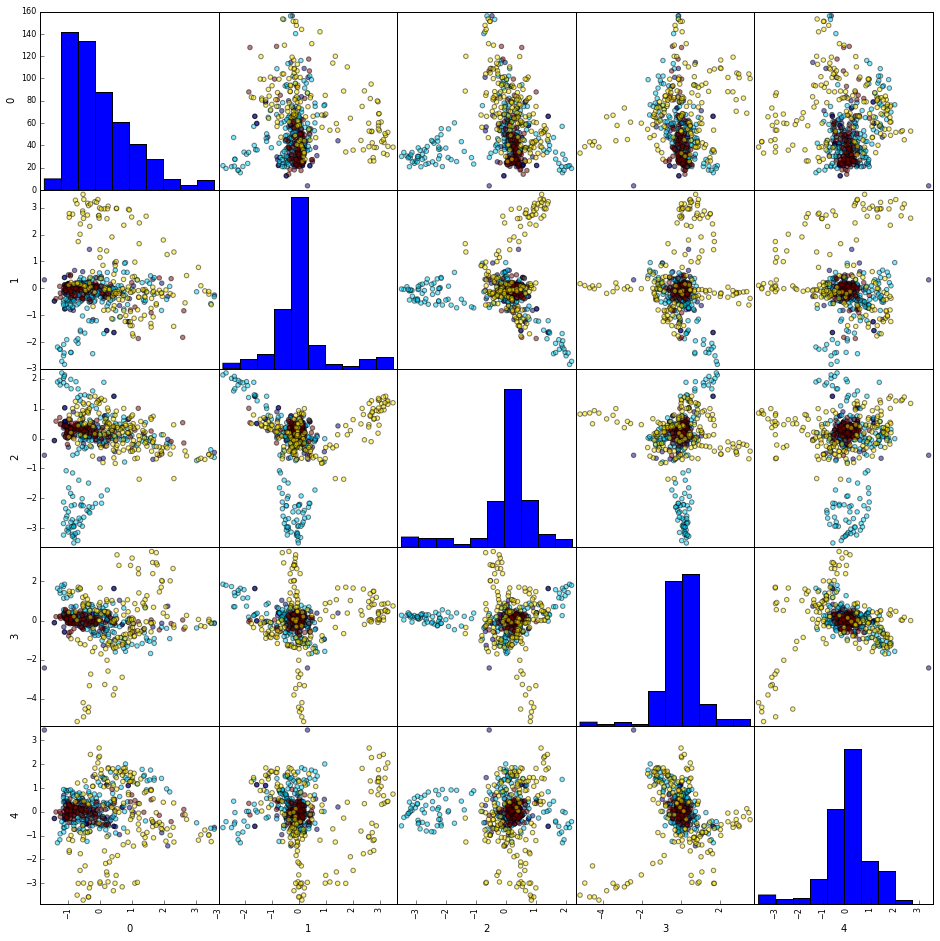

In [5]:
import pandas as pd
from sklearn import preprocessing
pcafeats = pd.DataFrame(pca.transform(feats)[:, :5])
l = preprocessing.label.LabelEncoder()
colors = l.fit_transform(labels)
axes = pd.scatter_matrix(pcafeats, marker = "o", c = colors, alpha = 0.5, figsize=(16, 16), label = labels, )

In [22]:
pcafeats[0].shape

(528,)